In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# to get data from website
base_url="https://www.foreca.com/100112931/Tehran-Iran/10-day-forecast"
#soup = BeautifulSoup(file.content, "html.parser")
page = requests.get(base_url)
soup = BeautifulSoup(page.text, 'html.parser')

In [ ]:
# create empty list
list =[]
# find all table with class-"twc-table"
content= soup.find_all('div', attrs={"class":"day"})
content

#for items in content:
#    for i in range(len(items.find_all('a', class_='dayLink'))):
#     print(items.findAll( attrs={"class":"weekday"})[i].text)

[<div class="day"><a class="dayLink" href="/100112931/Tehran-Iran/hourly?day=0"><div class="weekday">Fri</div><div class="dataContainer"><div class="sunny"><div class="date"><span class="value time time_12h">11/3</span> <span class="value time time_24h">03/11</span></div><img alt="Clear" class="symb" height="50" src="/public/images/symbols/d000.svg" title="Clear" width="50"/><div class="temp">Max<br/><span class="value temp temp_f">70°</span> <span class="value temp temp_c">+21°</span></div><div class="temp">Min<br/><span class="value temp temp_f">57°</span> <span class="value temp temp_c">+14°</span></div><div class="wind"><img alt="SW" height="30" src="/public/images/wind/blue/w225.svg" width="30"/><div class="windText"><span class="value wind wind_mph"><em>2</em></span> <span class="value wind wind_mph"><em>mph</em></span> <span class="value wind wind_ms"><em>1</em></span> <span class="value wind wind_ms"><em>m/s</em></span> <span class="value wind wind_kmh"><em>4</em></span> <span 

In [ ]:
for items in content:
    for i in range(len(items.find_all('a'))):
                # create empty dictionary
        dict = {}
        #anchor_class = i.get('dayLink')
        try:
                        # assign value to given key

            dict["date"]= items.find_all( attrs={"class":"value time time_12h"})[i].text
            dict["day"]= items.find_all(attrs={"class":"weekday"})[i].text
          #  dict["desc"]= items.find_all('div', attrs={"class":"dataContainer"})[i].text
            dict["temp Max celsious"]= items.find_all(attrs={"class":"value temp temp_c"})[i].text
            dict["temp Min celsious"]= items.find_all(attrs={"class":"value temp temp_c"})[i+1].text
            #dict["precip"]= items.find_all("td", {"class":"precip"})[i].text
            dict["wind km/h"]= items.find_all(attrs={"class":"value wind wind_kmh"})[i].text
            dict["rain inch"]= items.find_all(attrs={"class":"value rain rain_in"})[i].text
        except:
                     # assign None values if no items are there with specified class

            dict["date"]="None"
            dict["day"]="None"
            dict["temp Max"]="None"
            dict["temp Min"]="None"
            dict["precip"]="None"
            dict["wind km/h"]="None"
            dict["rain_inch"]="None"

        # append dictionary values to the list
        list.append(dict)
list

[{'date': '11/3',
  'day': 'Fri',
  'temp Max celsious': '+21°',
  'temp Min celsious': '+14°',
  'wind km/h': '4',
  'rain inch': '0 in'},
 {'date': '11/4',
  'day': 'Sat',
  'temp Max celsious': '+18°',
  'temp Min celsious': '+13°',
  'wind km/h': '4',
  'rain inch': '0.01 in'},
 {'date': '11/5',
  'day': 'Sun',
  'temp Max celsious': '+18°',
  'temp Min celsious': '+11°',
  'wind km/h': '7',
  'rain inch': '0.01 in'},
 {'date': '11/6',
  'day': 'Mon',
  'temp Max celsious': '+20°',
  'temp Min celsious': '+11°',
  'wind km/h': '7',
  'rain inch': '0 in'},
 {'date': '11/7',
  'day': 'Tue',
  'temp Max celsious': '+21°',
  'temp Min celsious': '+12°',
  'wind km/h': '7',
  'rain inch': '< 0,01 in'},
 {'date': '11/8',
  'day': 'Wed',
  'temp Max celsious': '+20°',
  'temp Min celsious': '+12°',
  'wind km/h': '7',
  'rain inch': '0 in'},
 {'date': '11/9',
  'day': 'Thu',
  'temp Max celsious': '+20°',
  'temp Min celsious': '+11°',
  'wind km/h': '4',
  'rain inch': '0 in'},
 {'date':

In [ ]:
import pandas as pd
df = pd.DataFrame(list)
df


,date,day,temp Max celsious,temp Min celsious,wind km/h,rain inch
0,11/3,Fri,+21°,+14°,4,0 in
1,11/4,Sat,+18°,+13°,4,0.01 in
2,11/5,Sun,+18°,+11°,7,0.01 in
3,11/6,Mon,+20°,+11°,7,0 in
4,11/7,Tue,+21°,+12°,7,"< 0,01 in"
5,11/8,Wed,+20°,+12°,7,0 in
6,11/9,Thu,+20°,+11°,4,0 in
7,11/10,Fri,+22°,+12°,7,0 in
8,11/11,Sat,+20°,+12°,4,0 in
9,11/12,Sun,+20°,+12°,4,0 in


**Data Cleaning**

In [ ]:

if type(df['temp Max celsious'])=='int64':
 df['temp Max celsious'] = df['temp Max celsious'].str.replace('°', '').astype(int)
if type(df['temp Min celsious'])=='int64':
 df['temp Min celsious'] = df['temp Min celsious'].str.replace('°', '').astype(int)
if type(df['rain inch'])=='float64':
 df['rain inch'] = df['rain inch'].str.replace(' in','').str.replace('<','').str.replace(',','.').astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10 non-null     object 
 1   day                10 non-null     object 
 2   temp Max celsious  10 non-null     int64  
 3   temp Min celsious  10 non-null     int64  
 4   wind km/h          10 non-null     object 
 5   rain inch          10 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 608.0+ bytes


In [ ]:
df.describe()
df

,date,day,temp Max celsious,temp Min celsious,wind km/h,rain inch
0,11/3,Fri,21,14,4,0.00
1,11/4,Sat,18,13,4,0.01
2,11/5,Sun,18,11,7,0.01
3,11/6,Mon,20,11,7,0.00
4,11/7,Tue,21,12,7,0.01
5,11/8,Wed,20,12,7,0.00
6,11/9,Thu,20,11,4,0.00
7,11/10,Fri,22,12,7,0.00
8,11/11,Sat,20,12,4,0.00
9,11/12,Sun,20,12,4,0.00


10 days Boxplot to show temperature (Day vs. Night)

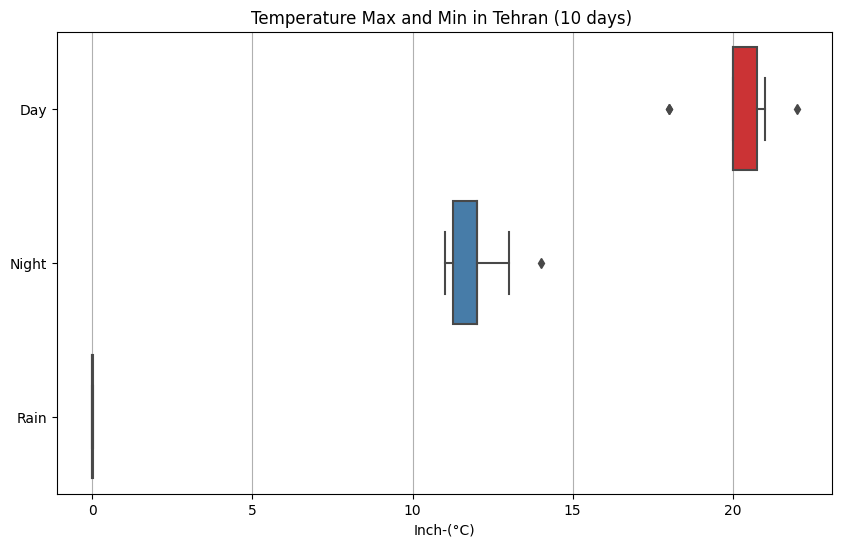

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['temp Max celsious', 'temp Min celsious','rain inch']], orient='h', palette='Set1')
plt.title('Temperature Max and Min in Tehran (10 days) ')
plt.xlabel('Inch-(°C)')
plt.yticks([0, 1, 2], ['Day', 'Night', 'Rain'])
plt.grid(axis='x')
plt.show()

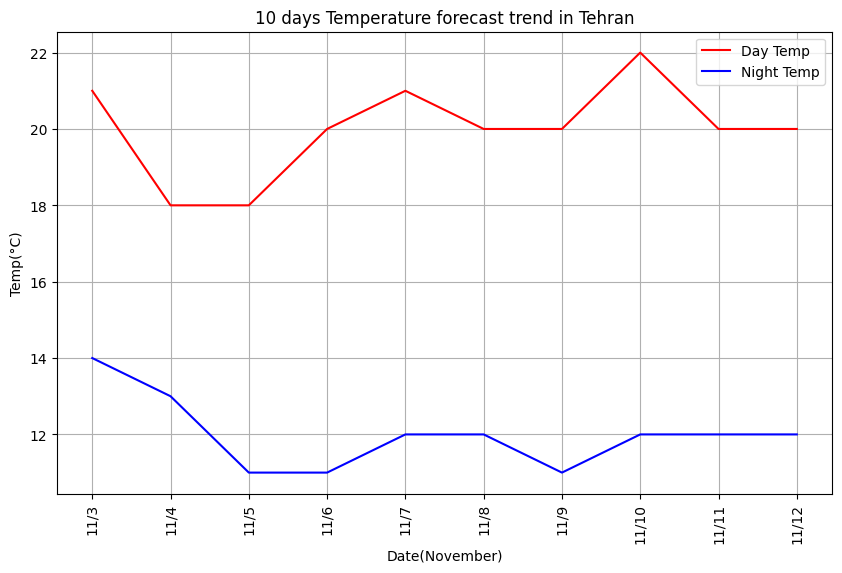

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temp Max celsious'], label='Day Temp',   color='r')
plt.plot(df['date'], df['temp Min celsious'], label='Night Temp',   color='b')

plt.title('10 days Temperature forecast trend in Tehran')
plt.xlabel('Date(November)')
plt.ylabel('Temp(°C)')
plt.legend()
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

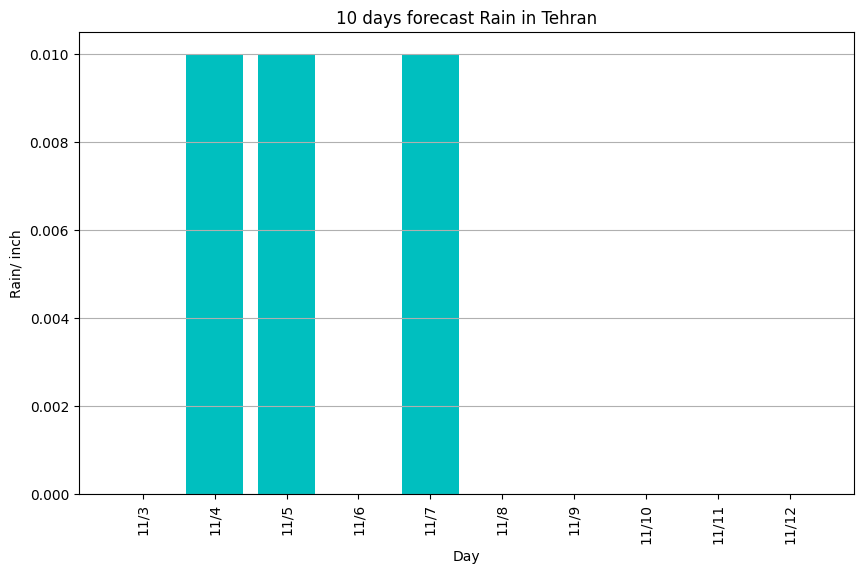

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['rain inch'], color='c')

plt.title('10 days forecast Rain in Tehran')
plt.xlabel('Day')
plt.ylabel('Rain/ inch')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.show()

##Data Export

In [ ]:
df.to_csv('tehran_weather_averages.csv')

## Conclusion
This analysis explores the 10 days forecast weather for Tehran, considering the max and min  temperatures, as well as the amount of rain for each day. The analysis includes data scraping, data cleaning, data visualization, and statistical summaries. Key findings and visualizations are presented to help forecast Tehran's weather.

Based on the weather forecast, the rainy days doesn't have correlation with the Temperature. In addition,the average rain inches are 0.03 inches in next 10 days which is very low. During the next 10 days, average max and min temperatures is around 20°C and 12°C accordingly.